In [2]:
!pip install tensorflow==2.18.0

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.0-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.68.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached h5py-3.12.1-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.0.8-py3-no

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Set the seed for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

### Download and Unzip the Dataset

In [15]:
!pip install requests

In [16]:
import requests  # Import requests
import os
import zipfile

In [17]:
# URL of the dataset
url = "https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip"

In [18]:
zip_path = "data.zip"

In [19]:
# Download the file
response = requests.get(url)
with open(zip_path, "wb") as file:
    file.write(response.content)

In [20]:
# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")

In [21]:
# Verify the extracted content
print("Files extracted:")
print(os.listdir("data"))

Files extracted:
['test', 'train']


### Load and Preprocess the Data

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# Define directories
train_dir = 'data/train'
test_dir = 'data/test'

In [24]:
# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
# Create data generators for training and testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Resize images to 200x200
    batch_size=32,
    class_mode='binary'  # Binary classification
)

Found 800 images belonging to 2 classes.


In [26]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary'
)

Found 201 images belonging to 2 classes.


### Build the CNN Model

In [27]:
from tensorflow.keras import layers, models, optimizers

In [29]:
# Build the CNN model with Input layer
model = models.Sequential([
    layers.Input(shape=(200, 200, 3)),  # Define the input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

In [30]:
# Compile the model
model.compile(
    optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [31]:
# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 313632)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │      20,072,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [32]:
# Train the model
history = model.fit(
    train_generator,          # Training data
    epochs=10,                # Number of epochs
    validation_data=test_generator  # Validation data
)

C:\Users\a_farnoo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 312ms/step - accuracy: 0.5049 - loss: 0.7356 - val_accuracy: 0.6368 - val_loss: 0.6480
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 303ms/step - accuracy: 0.6075 - loss: 0.6290 - val_accuracy: 0.6070 - val_loss: 0.6653
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 291ms/step - accuracy: 0.6548 - loss: 0.5962 - val_accuracy: 0.6269 - val_loss: 0.6208
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 0.6986 - loss: 0.5719 - val_accuracy: 0.6468 - val_loss: 0.6167
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - accuracy: 0.6989 - loss: 0.5661 - val_accuracy: 0.6418 - val_loss: 0.6201
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step - accuracy: 0.7295 - loss: 0.5361 - val_accuracy: 0.6418 - val_loss: 0.6067
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/step - accuracy: 0.7551 - loss: 0.5147 - val_accuracy: 0.6318 - val_loss: 0.6362
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 328ms/step - accuracy: 0.7377 - loss: 0.5394 - val_accuracy: 0.

### Evaluate the Model

In [33]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7083 - loss: 0.5589
Test Loss: 0.6095
Test Accuracy: 0.6468


### Visualize Training and Validation Performance

In [34]:
import matplotlib.pyplot as plt

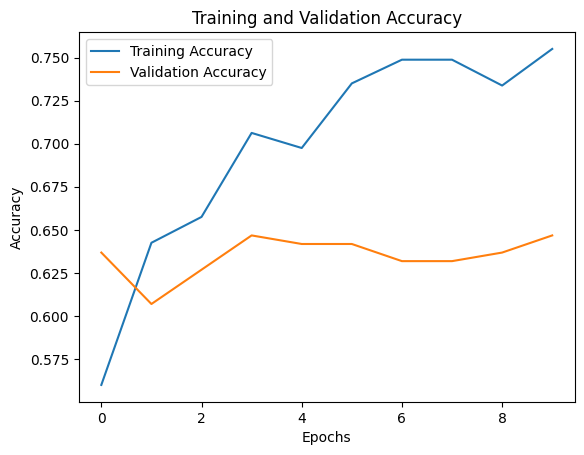

In [35]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

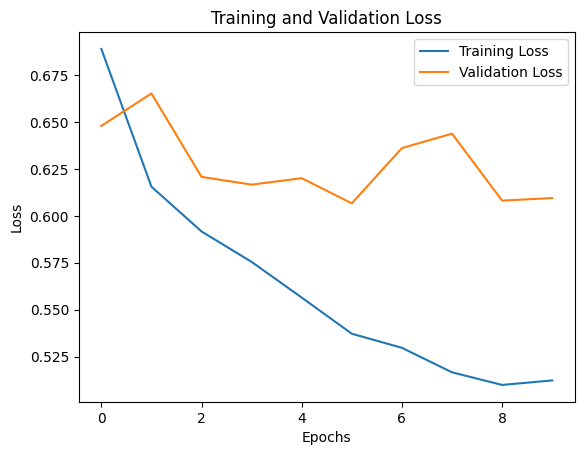

In [36]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### Q3

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Save the Model

In [40]:
# Define the directories
train_dir = 'data/train'
test_dir = 'data/test'

In [41]:
# Create data generators with rescaling
datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,  # Batch size = 20
    class_mode='binary',  # Binary classification
    shuffle=True  # Shuffle the training data
)

Found 800 images belonging to 2 classes.


In [43]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,  # Batch size = 20
    class_mode='binary',  # Binary classification
    shuffle=True  # Shuffle the test data
)

Found 201 images belonging to 2 classes.


In [44]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 205ms/step - accuracy: 0.7940 - loss: 0.4466 - val_accuracy: 0.6517 - val_loss: 0.6446
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.7776 - loss: 0.4750 - val_accuracy: 0.6020 - val_loss: 0.8152
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.7651 - loss: 0.5060 - val_accuracy: 0.6517 - val_loss: 0.6010
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.8074 - loss: 0.4337 - val_accuracy: 0.6866 - val_loss: 0.5788
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.8051 - loss: 0.3941 - val_accuracy: 0.6766 - val_loss: 0.6091
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 198ms/step - accuracy: 0.8518 - loss: 0.3564 - val_accuracy: 0.6766 - val_loss: 0.5784
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.8564 - loss: 0.3464 - val_accuracy: 0.6965 - val_loss: 0.5882
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.8681 - loss: 0.3316 - val_accuracy: 0.

In [45]:
import numpy as np

In [46]:
# Extract training accuracies for all epochs
training_accuracies = history.history['accuracy']

In [47]:
# Calculate the median
median_accuracy = np.median(training_accuracies)
print(f"Median Training Accuracy: {median_accuracy:.2f}")

Median Training Accuracy: 0.83


### Q4

In [48]:
# Extract training losses for all epochs
training_losses = history.history['loss']

In [49]:
# Calculate the standard deviation of training losses
std_dev_loss = np.std(training_losses)
print(f"Standard Deviation of Training Loss: {std_dev_loss:.3f}")

Standard Deviation of Training Loss: 0.068


### Q5

In [50]:
# Update the training data generator with augmentations
train_augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [51]:
# Create the augmented training data generator
train_augmented_generator = train_augmented_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,  # Use the same batch size
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [52]:
# Train the model for 10 more epochs using augmented data
history_augmented = model.fit(
    train_augmented_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 322ms/step - accuracy: 0.6896 - loss: 0.6239 - val_accuracy: 0.6368 - val_loss: 0.6408
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 309ms/step - accuracy: 0.6974 - loss: 0.5830 - val_accuracy: 0.7662 - val_loss: 0.5259
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 323ms/step - accuracy: 0.7117 - loss: 0.5646 - val_accuracy: 0.6219 - val_loss: 0.6504
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 360ms/step - accuracy: 0.7184 - loss: 0.5619 - val_accuracy: 0.7065 - val_loss: 0.5811
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 322ms/step - accuracy: 0.7102 - loss: 0.5626 - val_accuracy: 0.7463 - val_loss: 0.5289
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 325ms/step - accuracy: 0.6877 - loss: 0.5658 - val_accuracy: 0.7413 - val_loss: 0.5083
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step - accuracy: 0.7307 - loss: 0.5546 - val_accuracy: 0.7463 - val_loss: 0.5067
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 305ms/step - accuracy: 0.7444 - loss: 0.5239 - val_accu

In [53]:
# Extract test losses for all epochs
test_losses = history_augmented.history['val_loss']

In [54]:
# Calculate the mean of test losses
mean_test_loss = np.mean(test_losses)
print(f"Mean Test Loss: {mean_test_loss:.2f}")

Mean Test Loss: 0.55


### Q6

In [56]:
# Extract test (validation) accuracies for all epochs
test_accuracies = history_augmented.history['val_accuracy']

In [57]:
# Select accuracies for the last 5 epochs
last_5_test_accuracies = test_accuracies[5:10]

In [58]:
# Calculate the average test accuracy for the last 5 epochs
average_test_accuracy = np.mean(last_5_test_accuracies)
print(f"Average Test Accuracy (Epochs 6-10): {average_test_accuracy:.2f}")

Average Test Accuracy (Epochs 6-10): 0.74
